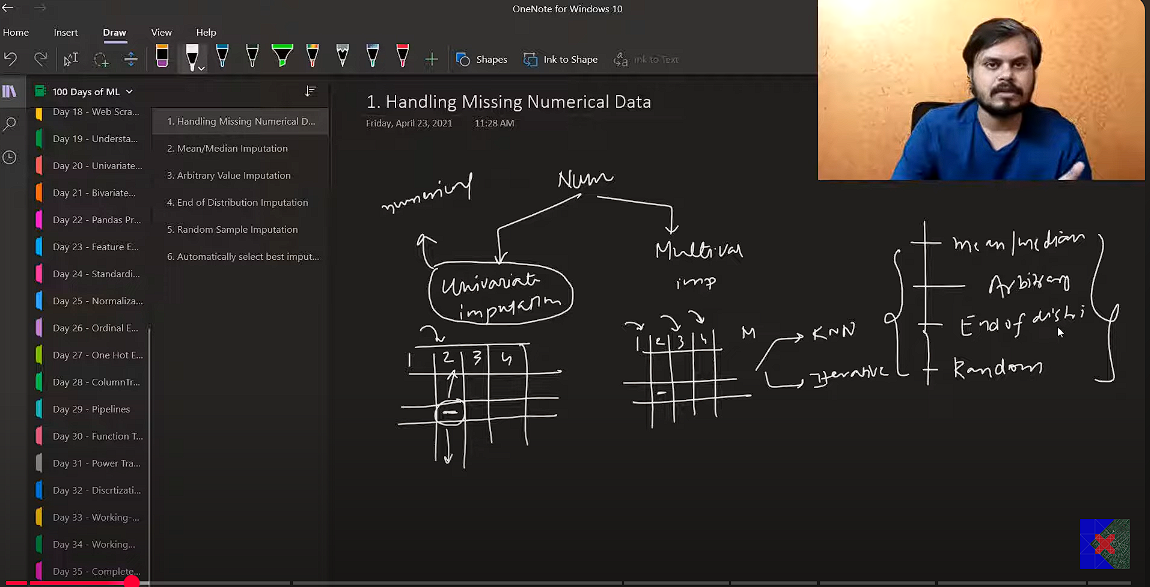

In [1]:
import csv

with open("housing_data.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["ID","Price","SqFt","Beds","Baths","Year","Lot","Garage"])
    for i in range(1, 511):
        # Price: Missing if ID mod 10 equals 3.
        price = "" if i % 10 == 3 else str(200000 + i * 500 + ((i % 7) * 10000))
        # SqFt: Missing if ID mod 15 equals 7.
        sqft = "" if i % 15 == 7 else str(800 + i * 5 + ((i % 9) * 20))
        beds = (i % 6) + 1
        # Baths: Missing if ID mod 12 equals 5; otherwise, equal to beds if beds<=3 else (beds - 0.5)
        if i % 12 == 5:
            baths = ""
        else:
            baths = str(beds) if beds <= 3 else f"{beds - 0.5:.1f}"
        # Year: Missing if ID mod 33 equals 0; else year = 1950 + (ID mod 71)
        year = "" if i % 33 == 0 else str(1950 + (i % 71))
        # Lot: Missing if ID mod 20 equals 0; else lot size = 0.1 + ((ID mod 20)*0.05)
        lot = "" if i % 20 == 0 else f"{0.1 + ((i % 20) * 0.05):.2f}"
        # Garage: Missing if ID mod 25 equals 0; else garage spaces = (ID mod 4)
        garage = "" if i % 25 == 0 else str(i % 4)
        writer.writerow([i, price, sqft, beds, baths, year, lot, garage])


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Practise on MY dataset (Housing dataset)😊

In [38]:
df = pd.read_csv('housing_data.csv')

In [39]:
df.sample(3)

,ID,Price,SqFt,Beds,Baths,Year,Lot,Garage
194,195,357500.0,1895.0,4,3.5,2003.0,0.85,3.0
19,20,270000.0,940.0,3,3.0,1970.0,NaN,0.0
288,289,364500.0,2265.0,2,2.0,1955.0,0.55,1.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      510 non-null    int64  
 1   Price   459 non-null    float64
 2   SqFt    476 non-null    float64
 3   Beds    510 non-null    int64  
 4   Baths   467 non-null    float64
 5   Year    495 non-null    float64
 6   Lot     485 non-null    float64
 7   Garage  490 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 32.0 KB


#### 1. Using mean/median imputation 

In [7]:
df.isnull().mean()*100

ID         0.000000
Price     10.000000
SqFt       6.666667
Beds       0.000000
Baths      8.431373
Year       2.941176
Lot        4.901961
Garage     3.921569
dtype: float64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Price', 'ID']),df['Price'],test_size=0.2,random_state=2)

In [43]:
X_train.isnull().mean()*100

SqFt      6.617647
Beds      0.000000
Baths     7.843137
Year      3.186275
Lot       4.656863
Garage    4.166667
dtype: float64

In [44]:
X_test.isnull().mean()*100

SqFt       6.862745
Beds       0.000000
Baths     10.784314
Year       1.960784
Lot        5.882353
Garage     2.941176
dtype: float64

### Filling using Pandas

In [45]:
# calculating mean and median of each column and storing it inside a dictionary
stats = {}
for col in X_train.columns:
    stats[f"mean {col}"] = X_train[col].mean()
    stats[f"median {col}"] = X_train[col].median()
stats

{'mean SqFt': 2152.309711286089,
 'median SqFt': 2155.0,
 'mean Beds': 3.5098039215686274,
 'median Beds': 4.0,
 'mean Baths': 3.0664893617021276,
 'median Baths': 3.0,
 'mean Year': 1983.8455696202532,
 'median Year': 1983.0,
 'mean Lot': 0.6023136246786632,
 'median Lot': 0.6,
 'mean Garage': 1.4833759590792839,
 'median Garage': 1.0}

In [46]:
X_train.sample(3)

,SqFt,Beds,Baths,Year,Lot,Garage
463,3220.0,3,3.0,1988.0,0.30,0.0
370,2695.0,6,5.5,1966.0,0.65,3.0
107,1340.0,1,1.0,1987.0,0.50,0.0


In [47]:
X_train.isnull().mean()*100

SqFt      6.617647
Beds      0.000000
Baths     7.843137
Year      3.186275
Lot       4.656863
Garage    4.166667
dtype: float64

In [48]:
# Then, for any column that has missing values, create new columns
# filled with the corresponding mean and median from 'stats'
for col in X_train.columns:
    if X_train[col].isnull().any():
        X_train[f"mean {col}"] = X_train[col].fillna(stats[f"mean {col}"])
        X_train[f"median {col}"] = X_train[col].fillna(stats[f"median {col}"])

In [52]:
X_train.sample(3)

,SqFt,Beds,Baths,Year,Lot,Garage,mean SqFt,median SqFt,mean Baths,median Baths,mean Year,median Year,mean Lot,median Lot,mean Garage,median Garage
131,1580.0,1,1.0,NaN,0.70,0.0,1580.000000,1580.0,1.000000,1.0,1983.84557,1983.0,0.70,0.70,0.0,0.0
76,1285.0,6,NaN,1956.0,0.95,1.0,1285.000000,1285.0,3.066489,3.0,1956.00000,1956.0,0.95,0.95,1.0,1.0
381,NaN,5,4.5,1977.0,0.20,2.0,2152.309711,2155.0,4.500000,4.5,1977.00000,1977.0,0.20,0.20,2.0,2.0


In [ ]:
for col in X_train.columns:
    print(f"{col} variance: {X_train[col].var()}")

In [78]:
def check_mean_median_columns(df, col_name):
    mean_col = f"mean {col_name}"
    median_col = f"median {col_name}"
    
    return {
        'mean_index': df.columns.get_loc(mean_col) if mean_col in df.columns else None,
        'median_index': df.columns.get_loc(median_col) if median_col in df.columns else None
    }

In [82]:
check_mean_median_columns(X_train,'Baths')

{'mean_index': 8, 'median_index': 9}

In [83]:
original_cols = [
    c for c in X_train.columns 
    if not (c.startswith('mean ') or c.startswith('median '))
]
original_cols

['SqFt', 'Beds', 'Baths', 'Year', 'Lot', 'Garage']

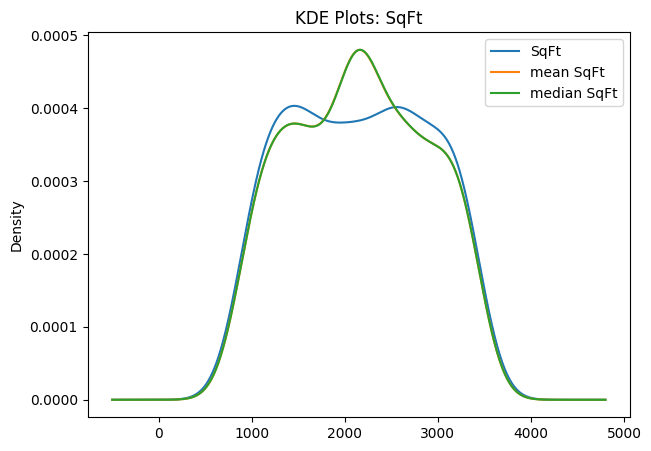

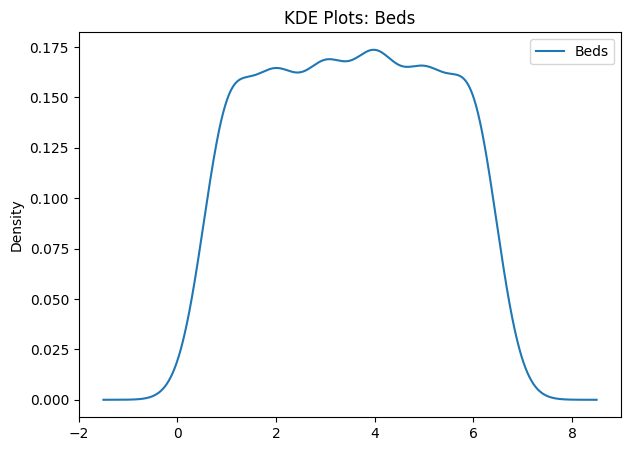

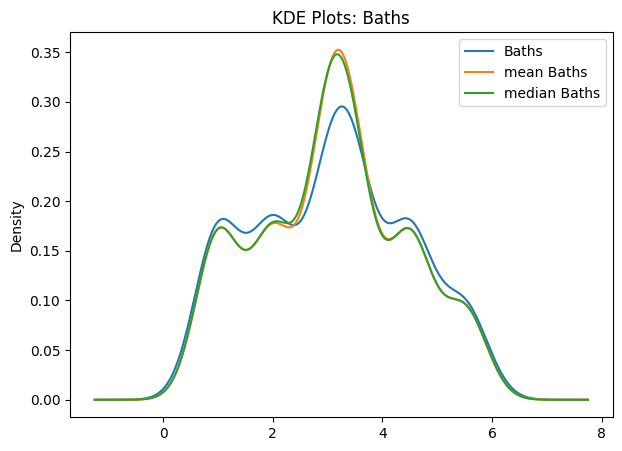

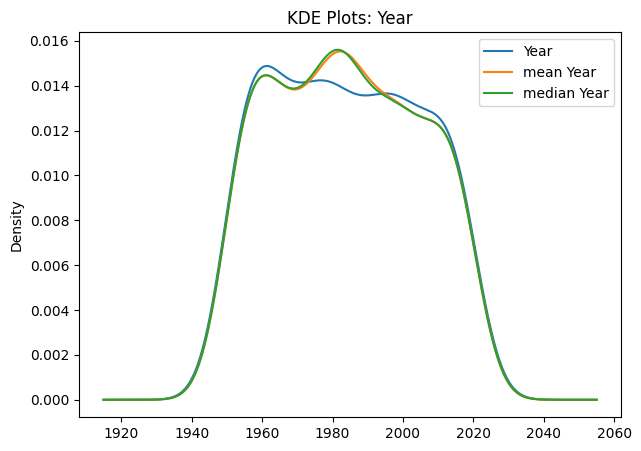

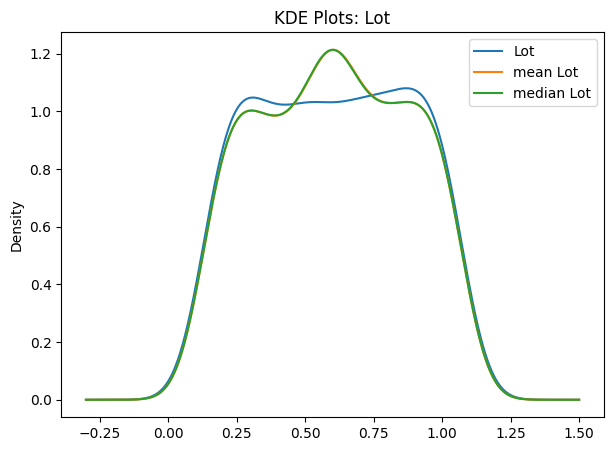

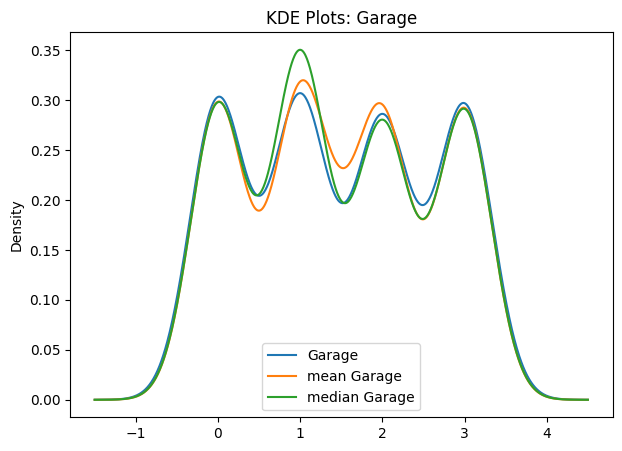

In [79]:
# If you have a list of original columns, use it; otherwise, filter out columns
# that start with "mean " or "median "
original_cols = [
    c for c in X_train.columns 
    if not (c.startswith('mean ') or c.startswith('median '))
]

for col in original_cols:
    indices = check_mean_median_columns(X_train, col)
    mean_idx = indices['mean_index']
    median_idx = indices['median_index']

    # Create a new figure for each original column
    fig, ax = plt.subplots(figsize=(7,5))
    
    # Plot the original column
    X_train[col].plot(kind='kde', ax=ax, label=col)
    
    # Plot mean column if it exists
    if mean_idx is not None:
        X_train.iloc[:, mean_idx].plot(kind='kde', ax=ax, label=f"mean {col}")
    
    # Plot median column if it exists
    if median_idx is not None:
        X_train.iloc[:, median_idx].plot(kind='kde', ax=ax, label=f"median {col}")
    
    ax.set_title(f"KDE Plots: {col}")
    ax.legend()
    plt.show()
